In [2]:
import json 
import pandas as pd
import numpy as np
import proplot as pplot
import matplotlib.pyplot as plt

In [3]:
X=[0.2,0.3,0.4,0.5,0.6]
results=[]
for x in X:
    file_name=f"{x}.json"
    result={}
    with open(file_name,"r") as fp:
        text=json.load(fp)
        result["X"]=x
        result["m_camix"]=text["plant"]["carb"]["m_caco3_out"]+text["plant"]["carb"]["m_cao_unr_out"]
        result["m_cao"]=text["plant"]["carb"]["m_cao_in"]
        result["HEN_Carb"]=text["plant"]["carb"]["total_HEN_area"]
        result["HEN_Calc"]=text["plant"]["calc"]["total_HEN_area"]
        result["conveying_Carb"]=text["plant"]["carb"]["conveying_power"]
        result["conveying_Calc"]=text["plant"]["calc"]["conveying_power"]
        result["cold_utility"]=text["plant"]["carb"]["cold_utility"]
        result["Q_hot_water"]=text["metrics"]["energy"]["Q_hot_water"]
        result["total_power"]=text["metrics"]["energy"]["total_power"]
        result["cost_HEN_Carb"]=text["metrics"]["economic"]["construction"]["equipment"]["CHENCarb"]
        result["cost_HEN_Calc"]=text["metrics"]["economic"]["construction"]["equipment"]["CHENCalc"]
        result["total_equipment_cost"]=text["metrics"]["economic"]["construction"]["equipment"]["total"]
        result["heat_storage_eff"]=text["metrics"]["energy"]["heat_storage_eff"]
        results.append(result)
df=pd.DataFrame(results)
df.head(10)

,X,m_camix,m_cao,HEN_Carb,HEN_Calc,conveying_Carb,conveying_Calc,cold_utility,Q_hot_water,total_power,cost_HEN_Carb,cost_HEN_Calc,total_equipment_cost,heat_storage_eff
0,0.2,30.243935,26.136734,1077.520,8678.877828,-563806.680801,-563806.680801,1.216526e+06,1.549225e+07,2.022685e+07,2.260116,8.916695,54.467352,0.765925
1,0.3,21.355286,17.281734,705.411,5577.510138,-386370.204254,-386370.204254,1.088499e+06,1.549225e+07,1.956956e+07,1.701618,6.630532,51.314189,0.791651
2,0.4,16.961632,12.905590,548.748,3745.806567,-298672.220813,-298672.220813,1.025053e+06,1.549225e+07,1.924589e+07,1.438088,5.078187,49.343535,0.804964
3,0.5,14.355112,10.306234,464.919,3095.505495,-246613.466812,-246613.466812,9.880499e+05,1.550775e+07,1.906210e+07,1.286911,4.469135,48.506240,0.813538
4,0.6,12.599324,8.562648,412.449,3642.944457,-211619.720138,-211619.720138,9.616850e+05,1.549225e+07,1.891538e+07,1.187692,4.984327,48.832992,0.819029


In [29]:
c1 = pplot.scale_luminance('cerulean', 0.5)
c2 = pplot.scale_luminance('red', 0.5)

with pplot.rc.context({'lines.linewidth': 2,"axes.labelsize":12,"tick.labelsize":11,
        "lines.marker":"o","lines.markersize":4,"legend.fontsize":14,"grid":False}):
        fig, axs = pplot.subplots(refaspect=(4, 3), axwidth=4,ncols=3, nrows=1, share=False)
        axs[0].plot(df['X'], df['m_camix'],label="CaCO$_{3}$",color=c1)
        axs[0].plot(df['X'], df['m_cao'],label="CaO",linestyle="--",color=c2)
        axs[0].format(xlabel="X",ylabel="mass flow (kg/s)")
        axs[0].legend(loc="best", ncols=1, fancybox=True)

        axs[1].plot(df['X'], df['heat_storage_eff']*100,color=c1,label="energy efficiency")
        axs[1].format(xlabel="X",ylabel="energy efficiency (%)")
        axs[1].plot([],[],linestyle="--",color=c2,label="equipement cost")
        axs[1].legend(fancybox=True,ncol=1)
        axs1_2=axs[1].twinx()
        axs1_2.plot(df['X'], df['total_equipment_cost'],linestyle="--",color=c2)
        axs1_2.format(xlabel="X",ylabel="equipment cost (Million RMB)",ycolor=c2)
        
        axs[2].plot(df['X'], df['total_power']/1e6,color=c1,label="consumed power")
        axs[2].format(xlabel="X",ylabel="consumed power (MW)",ylim=[15,20.5])
        axs[2].plot([],[],linestyle="--",color=c2,label="heat supply")
        axs[2].legend(fancybox=True,ncol=1,loc="ur")
        axs2_2=axs[2].twinx()
        axs2_2.plot(df['X'], df['Q_hot_water']/1e6,linestyle="--",color=c2)
        axs2_2.format(xlabel="X",ylabel="heat supply (MW)",ylim=[15,20.5],ycolor=c2)
        fig.savefig("./analysis_formal.jpg", bbox_inches='tight')



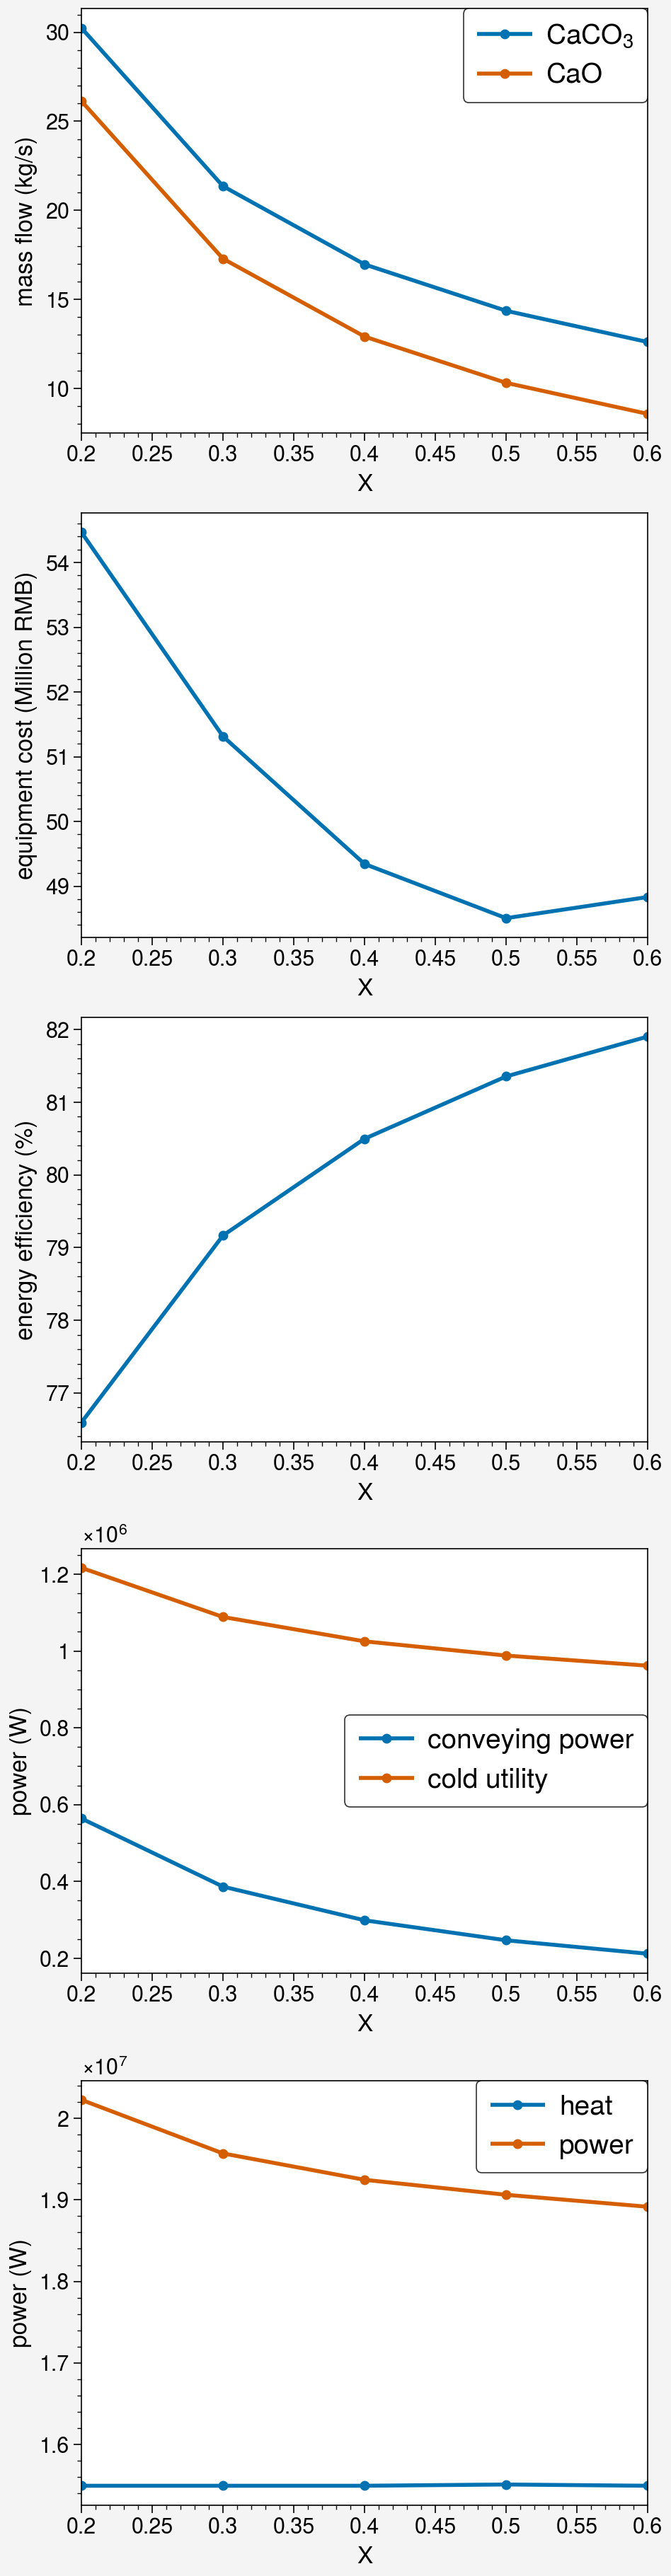

In [33]:
with pplot.rc.context({'lines.linewidth': 2,"axes.labelsize":12,"tick.labelsize":11,
        "lines.marker":"o","lines.markersize":4,"legend.fontsize":14,"grid":False}):
        fig, axs = pplot.subplots(refaspect=(4, 3), axwidth=4,ncols=1, nrows=5, share=False)
        axs[0].plot(df['X'], df['m_camix'],label="CaCO$_{3}$")
        axs[0].plot(df['X'], df['m_cao'],label="CaO")
        axs[0].format(xlabel="X",ylabel="mass flow (kg/s)")
        axs[0].legend(loc="best", ncols=1, fancybox=True)

        axs[1].plot(df['X'], df['total_equipment_cost'])
        axs[1].format(xlabel="X",ylabel="equipment cost (Million RMB)")

        axs[2].plot(df['X'], df['heat_storage_eff']*100)
        axs[2].format(xlabel="X",ylabel="energy efficiency (%)")

        axs[3].plot(df['X'], -df['conveying_Carb'],label="conveying power")
        axs[3].plot(df['X'], df['cold_utility'],label="cold utility")
        axs[3].format(xlabel="X",ylabel="power (W)")
        axs[3].legend(loc="best", ncols=1, fancybox=True)  

        axs[4].plot(df['X'], df['Q_hot_water'],label="heat")
        axs[4].plot(df['X'], df['total_power'],label="power")
        axs[4].format(xlabel="X",ylabel="power (W)")
        axs[4].legend(loc="best", ncols=1, fancybox=True)  


        fig.savefig("./analysis.jpg", bbox_inches='tight')
        